In [1]:
minerals <- read.csv("../../../Data/minerals.csv")

In [4]:
head(minerals)

,Antimony,Gold
,<dbl>,<int>
1,3.08,1
2,6.15,1
3,2.35,1
4,0.30,0
5,0.30,0
6,9.62,1


To create a logistic regression model in R to predict the presence of gold based on the level of antimony, you can use the glm() function. 

In [5]:
model <- glm(Gold ~ Antimony, data = minerals, family = binomial)

This creates a logistic regression model with the "Gold" column as the response variable and the "Antimony" column as the predictor variable. The "minerals" argument specifies the data frame that contains the columns, and the "family" argument is set to "binomial" to indicate that the response variable is binary.

In [6]:
model


Call:  glm(formula = Gold ~ Antimony, family = binomial, data = minerals)

Coefficients:
(Intercept)     Antimony  
     -2.518        1.761  

Degrees of Freedom: 63 Total (i.e. Null);  62 Residual
Null Deviance:	    87.72 
Residual Deviance: 45.33 	AIC: 49.33

Before fitting the model, it is important to check the assumptions of logistic regression:

- Independence of observations
- Linearity of logit for continuous variable
- Absence of multicollinearity
- Missing not at random (MNAR)

After fitting the model, you can use the summary() function to see the coefficients and the p-values for the predictor variable. This will give you an idea of how strong the relationship is between the level of antimony and the presence of gold.

You can also use other functions like predict() and confint() to predict the probability of gold presence and the confidence interval of the predicted probability.

In layman's terms, the logistic regression model allows you to use the information about the level of antimony to estimate the probability of finding gold nearby. The model provides coefficients and p-values that indicate the strength of the relationship between the level of antimony and the presence of gold. It also allows you to predict the probability of finding gold nearby based on the level of antimony.

### before fitting this model <- glm(gold ~ Sb, data = data, family = binomial) how do we check for Independence of observations?

One way to check for independence of observations in your data is to create a scatter plot of your predictor variable (Sb) against your response variable (gold) and check for any patterns or clusters in the data. If there are clusters or patterns in the data, it may indicate that the observations are not independent.

Another way to check for independence of observations is to use a statistical test, such as the Durbin-Watson test, which tests for the presence of serial correlation (i.e. a relationship between consecutive observations) in the residuals of your model. The test statistic ranges between 0 and 4, with values close to 2 indicating independence, and values close to 0 or 4 indicating positive or negative serial correlation.

You can conduct the Durbin-Watson test in R by using the dwtest() function from the lmtest package, which can be installed and loaded into your session with the following command:

```r
install.packages("lmtest")
library(lmtest)
```

Then use the dwtest() function to perform the Durbin-Watson test on the residuals of your model:

```r
dwtest(model)
```

Additionally, you can also check for independence of observations by checking for multicollinearity using Variance Inflation Factor (VIF) or by checking for missing data and outliers.

In [7]:
install.packages("lmtest")
library(lmtest)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 1.7616, p-value = 0.1658
alternative hypothesis: true autocorrelation is greater than 0


The Durbin-Watson test is a statistical test used to detect the presence of autocorrelation in the residuals of a time series model. The test statistic (DW) ranges from 0 to 4, with values close to 2 indicating the absence of significant autocorrelation. The p-value is used to determine the significance of the test statistic. In this case, the p-value is 0.1658, which means there is not enough evidence to reject the null hypothesis of no autocorrelation in the residuals of the model. The alternative hypothesis is that true autocorrelation is greater than 0.

To test for linearity of the logit for the continuous variable in your logistic regression model, you can use a few different methods:

Plotting: You can create a scatter plot of the predictor variable (Sb) against the estimated log odds (logit) of the response variable (gold) and check if the relationship is linear. In R, you can use the plot() function with the "model" object to create this plot.


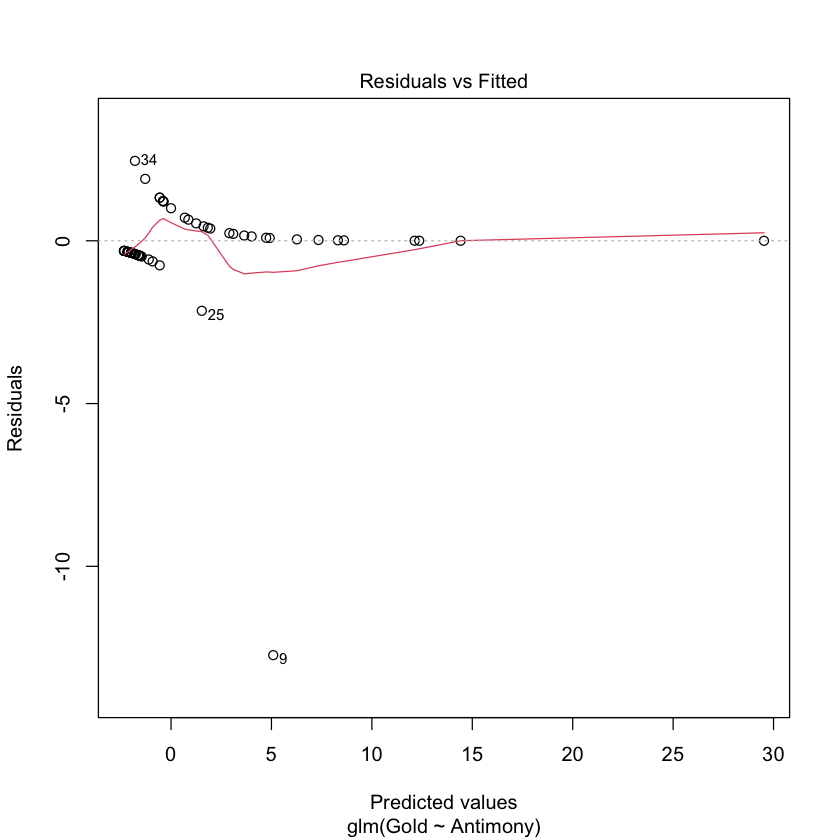

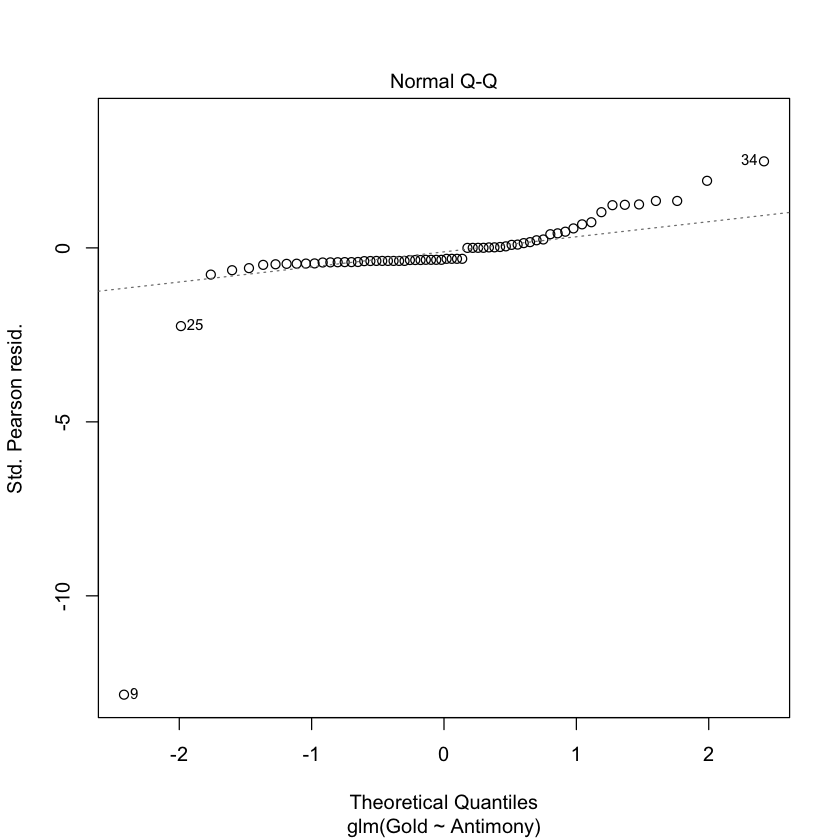

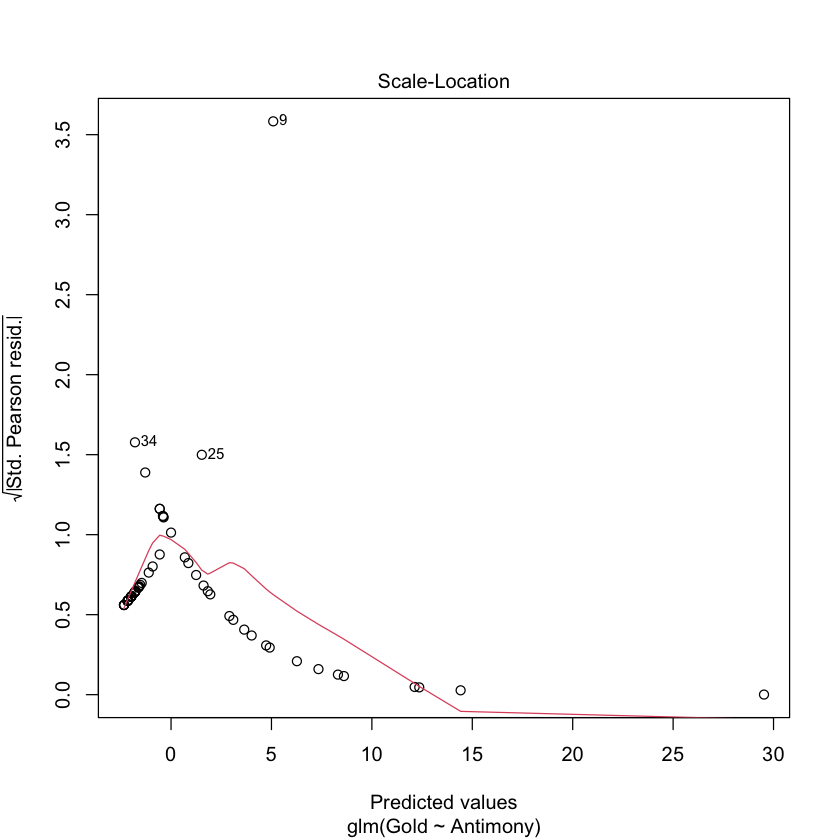

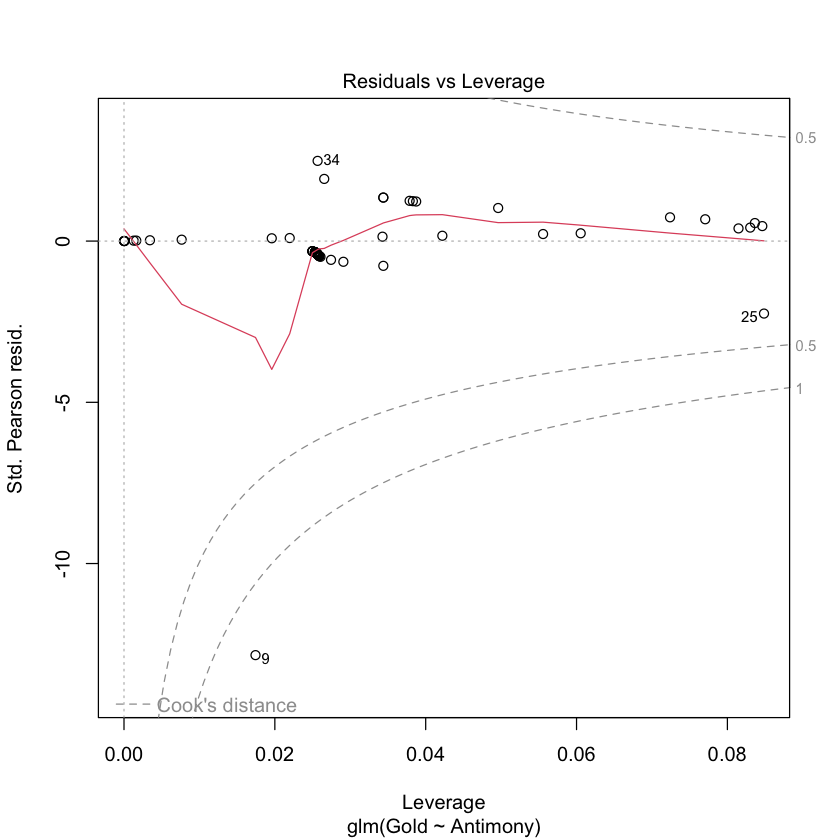

In [9]:
plot(model)

Residuals analysis: You can also check for linearity by analyzing the residuals of your model. You can plot the residuals against the predictor variable (Sb) and check if the residuals are randomly dispersed around zero, which would indicate linearity.

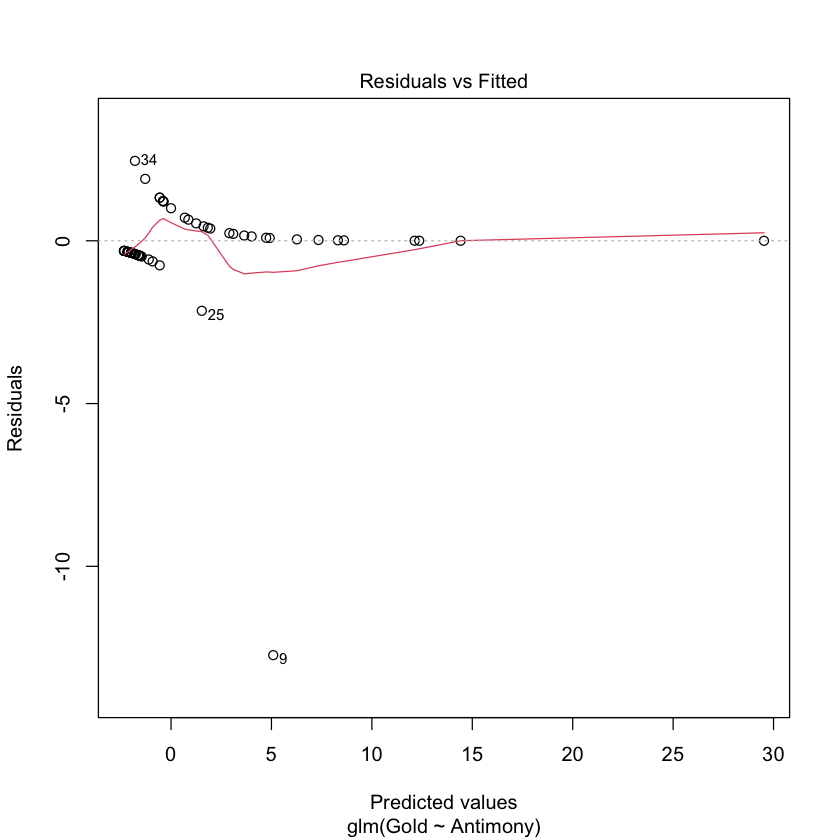

In [10]:
residuals_plot <- plot(model, which=1)

Likelihood ratio test: Another method to test linearity of the logit is by comparing the full model with a model that has a polynomial term of the predictor variable, for example, Sb^2. Then you can use a likelihood ratio test to compare the two models and check if the polynomial term improve the model fit.

In [11]:
model2 <- glm(Gold ~ Antimony + I(Antimony^2), data=minerals, family=binomial)
anova(model, model2, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,62,45.33227,NA,NA,NA
2,61,43.29550,1,2.036761,0.1535363


To check for the absence of multicollinearity in your logistic regression model, you can use the following methods:

Correlation Matrix: You can create a correlation matrix of all the predictor variables in your model and check if any of the variables are highly correlated. Values close to 1 or -1 indicate high correlation. In R, you can use the cor() function to create a correlation matrix.

In [13]:
cor(minerals[,c("Antimony")])

ERROR: Error in cor(minerals[, c("Antimony")]): supply both 'x' and 'y' or a matrix-like 'x'
